# Sentiment Normalization
### Coded by Marco Basile

In [1]:
import pandas as pd

reducedPapers = pd.read_csv(
    "../processedData/processedData.csv",
    sep=',',
    index_col=0
)

reducedPapers.dropna(subset = ['processedText'], inplace = True, how='any')
reducedPapers.reset_index(drop=True, inplace=True)
reducedPapers['timePeriod'] = pd.to_datetime(reducedPapers['timePeriod'])
reducedPapers.tail()

,index,timePeriod,processedText
152160,9996,2000-01-01,rather lose
152161,9997,2000-01-01,argument chamber
152162,9998,2000-01-01,happen next
152163,9999,2000-01-01,exempt hunt criticism regard
152164,10000,2000-01-01,miss ann widdecombe maidstone weald want press


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

royalWords = (
"""
    king
    queen
    royalty
    majesty
    crown
    prince
    princess
    regent
    monarch
    highness
""")
royalWords = royalWords.split()

def isRoyalTopic(text):
    if len(text.split()) < 4:
        return 0
    for word in text.split():
        if word in royalWords:
            return 1
    return 0

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0:
        return 1  # positivo
    elif compound_score < 0:
        return -1  # negativo
    else:
        return 0  # neutro

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
reducedPapers['royal'] = reducedPapers['processedText'].apply(isRoyalTopic)
reducedPapers.drop(reducedPapers[reducedPapers.royal == 0].index, inplace=True)
reducedPapers.tail()

,index,timePeriod,processedText,royal,sentiment
150685,8349,2000-01-01,hunt king heath let continue debate,1,0
151144,8874,2000-01-01,syndrome describe king fund relentless almost ...,1,1
151204,8935,2000-01-01,hunt king heath doubt listen child help protec...,1,-1
151245,8977,2000-01-01,hunt king heath move amendment page line end i...,1,0
151457,9197,2000-01-01,hunt king heath certainly accept nh effective ...,1,1


In [27]:
reducedPapers['sentiment'] = reducedPapers['processedText'].apply(get_sentiment)
reducedPapers.tail()

,index,timePeriod,processedText,royal,sentiment
150685,8349,2000-01-01,hunt king heath let continue debate,1,0
151144,8874,2000-01-01,syndrome describe king fund relentless almost ...,1,1
151204,8935,2000-01-01,hunt king heath doubt listen child help protec...,1,-1
151245,8977,2000-01-01,hunt king heath move amendment page line end i...,1,0
151457,9197,2000-01-01,hunt king heath certainly accept nh effective ...,1,1


In [ ]:
reducedPapers.to_csv('../processedData/sentimentData_normalized.csv', sep=',', columns=[ 'index','timePeriod', 'sentiment'])

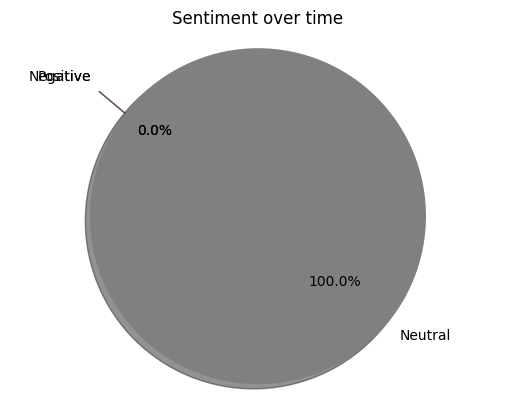

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sentimentData_normalized.csv')

texts = df['sentiment'].tolist()

sentiments = []
for text in texts:
    sentiment = get_sentiment(str(text))
    sentiments.append(sentiment)

total_count = len(sentiments)
positive_count = sentiments.count(1)
negative_count = sentiments.count(-1)
neutral_count = sentiments.count(0)

positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment over time')
plt.show()

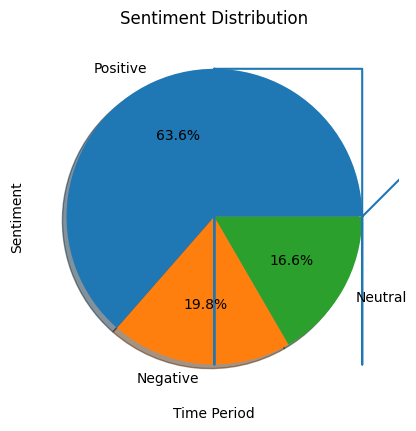

In [6]:
sentiment_counts = df['sentiment'].value_counts()
total_count = sentiment_counts.sum()
positive_percentage = (sentiment_counts[1] / total_count) * 100
negative_percentage = (sentiment_counts[-1] / total_count) * 100
neutral_percentage = (sentiment_counts[0] / total_count) * 100

sentiment_data = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Percentage': [positive_percentage, negative_percentage, neutral_percentage]
})

plt.plot(df['timePeriod'], df['sentiment'])
plt.xlabel('Time Period')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.xticks(rotation=45)


plt.pie(sentiment_data['Percentage'], labels=sentiment_data['Sentiment'], autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')
plt.show()

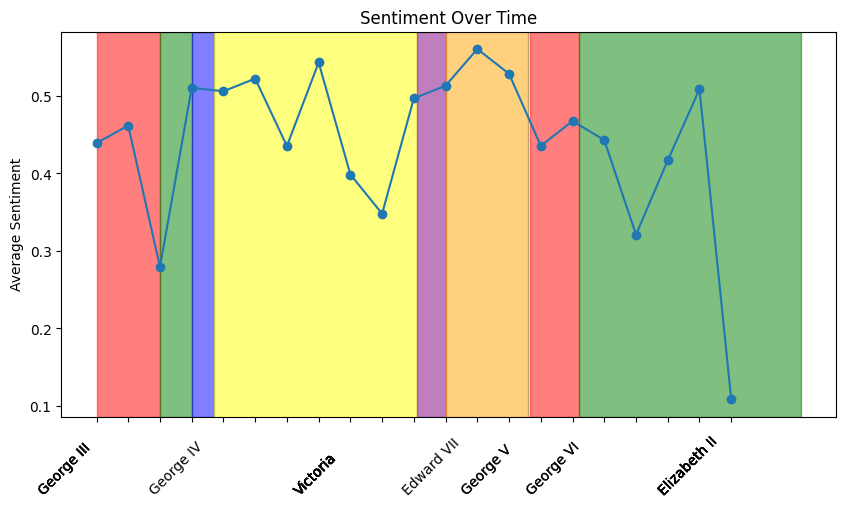

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sentimentData_normalized.csv')

df['timePeriod'] = pd.to_datetime(df['timePeriod'])

df['decade'] = df['timePeriod'].dt.year // 10 * 10
df_decade = df.groupby('decade')['sentiment'].mean().reset_index()

plt.plot(df_decade['decade'], df_decade['sentiment'], marker='o')
plt.xlabel('Decade')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


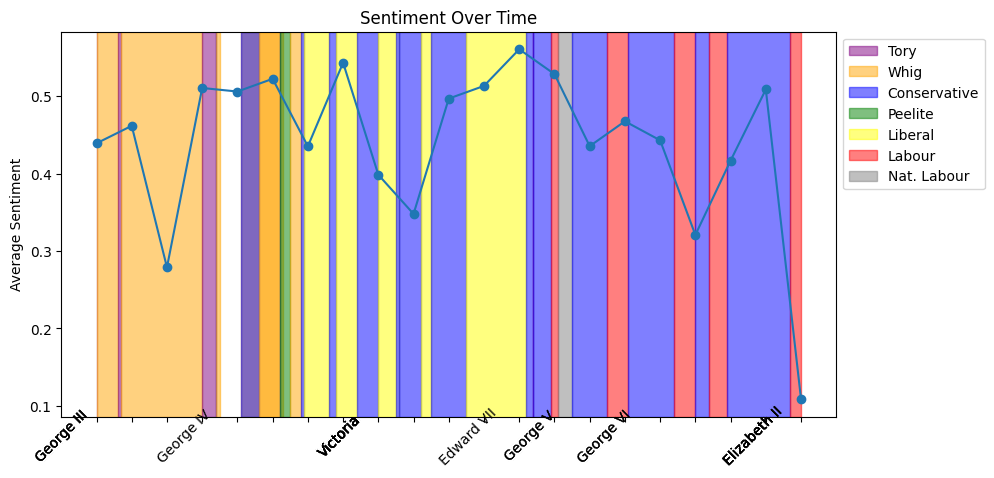

In [36]:
# create a list of monarch names and corresponding date ranges
monarchs = [('George III', '1760-10-25', '1820-01-29'),            ('George IV', '1820-01-29', '1830-06-26'),            ('William IV', '1830-06-26', '1837-06-20'),            ('Victoria', '1837-06-20', '1901-01-22'),            ('Edward VII', '1901-01-22', '1910-05-06'),            ('George V', '1910-05-06', '1936-01-20'),            ('Edward VIII', '1936-01-20', '1936-12-11'),            ('George VI', '1936-12-11', '1952-02-06'),            ('Elizabeth II', '1952-02-06', '2021-09-08')]

# create a list of x positions for monarch names
x = [pd.to_datetime(monarch[1]).year for monarch in monarchs]

# create a list of relative count values for sentiment 1 to sentiment 0
reducedPapers['timePeriod'] = pd.to_datetime(reducedPapers['timePeriod'])
reducedPapers_sentiment_1 = reducedPapers[reducedPapers['sentiment'] < 0.5]
reducedPapers_sentiment_0 = reducedPapers[reducedPapers['sentiment'] > 0.5]
count_by_time_1 = reducedPapers_sentiment_1.groupby('timePeriod').count()
count_by_time_0 = reducedPapers_sentiment_0.groupby('timePeriod').count()
relative_count = count_by_time_1['sentiment'] / count_by_time_0['sentiment']
y = relative_count.loc[pd.to_datetime(monarchs[0][1]):pd.to_datetime(monarchs[-1][2])]

# create the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y.index.year, y.values, label='Sentiment 1 / Sentiment 0')

# set the x ticks and labels
ax.set_xticks(x)
ax.set_xticklabels([monarch[0] for monarch in monarchs], rotation=90, ha='center')

# add axis labels and title
ax.set_xlabel('Monarch')
ax.set_ylabel('Relative Count')
ax.set_title('Sentiment ratio (1/0) over Time, by reign')

# show the plot
ax.axvspan(1800, 1820, color='red', alpha=0.5)
ax.axvspan(1820, 1830, color='green', alpha=0.5)
ax.axvspan(1830, 1837, color='blue', alpha=0.5)
ax.axvspan(1837, 1901, color='yellow', alpha=0.5)
ax.axvspan(1901, 1910, color='purple', alpha=0.5)
ax.axvspan(1910, 1936, color='orange', alpha=0.5)
ax.axvspan(1936, 1936, color='grey', alpha=0.5)
ax.axvspan(1936.5, 1952, color='red', alpha=0.5)
ax.axvspan(1952, 2022, color='green', alpha=0.5)

plt.show()